#### 数据集源自[Kaggle](https://www.kaggle.com/competitions/titanic/data)

In [1]:
import pandas as pd
import numpy as np
import pylab as plt

plt.rcParams['font.sans-serif'] = ['SimHei'] # 显示中文
plt.rcParams['axes.unicode_minus'] = False # 显示负号

# 设置图像大小
plt.rc('figure',figsize=(10,5))
fizsize_with_subplots=(10,10)
bin_size=10

In [2]:
df_train=pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train.info() # 字段Age、Cabin 有缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df_train.describe() # 描述性信息

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 探索性分析

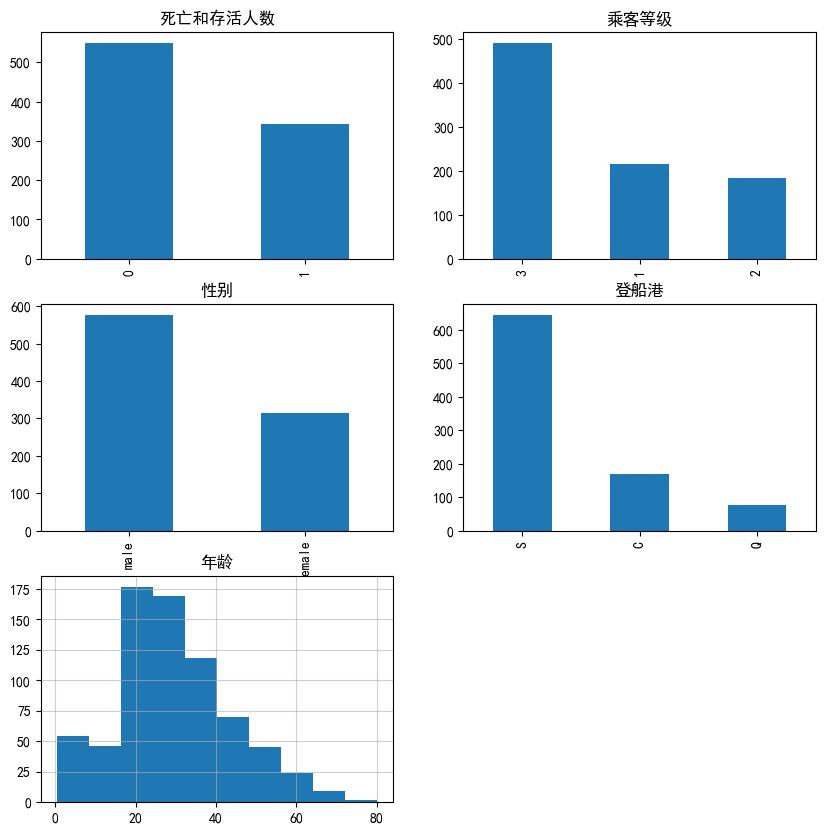

In [5]:
fig=plt.figure(figsize=fizsize_with_subplots)
fig_dims=(3,2)

# 死亡和存活人数
plt.subplot2grid(fig_dims,(0,0))
df_train['Survived'].value_counts().plot(kind='bar',title='死亡和存活人数')

# 乘客等级
plt.subplot2grid(fig_dims,(0,1))
df_train['Pclass'].value_counts().plot(kind='bar',title='乘客等级')

# 性别
plt.subplot2grid(fig_dims,(1,0))
df_train['Sex'].value_counts().plot(kind='bar',title='性别')

# 登船港
plt.subplot2grid(fig_dims,(1,1))
df_train['Embarked'].value_counts().plot(kind='bar',title='登船港')

# 年龄
plt.subplot2grid(fig_dims,(2,0))
df_train['Age'].hist()
plt.title('年龄')
plt.grid(alpha=0.6)

### 乘客等级对幸存率的影响
#### 从上面的探索性数据分析中，可以看到有三种乘客等级：一等舱、二等舱和三等舱。下面根据乘客等级确定幸存的乘客比例。

In [6]:
pclass_xt=pd.crosstab(df_train['Pclass'],df_train['Survived'])
pclass_xt

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


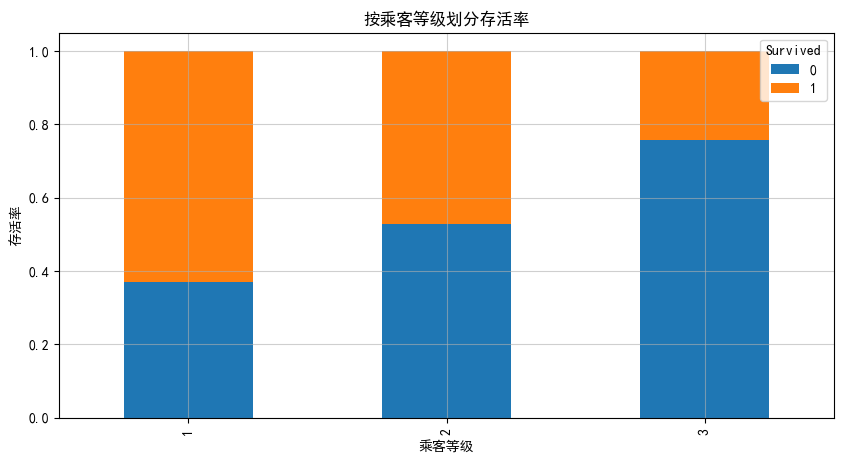

In [7]:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0) # 归一化

pclass_xt_pct.plot(kind='bar',stacked=True,title='按乘客等级划分存活率')
plt.xlabel('乘客等级')
plt.ylabel('存活率')
plt.grid(alpha=0.6)

#### 可以看到，乘客等级似乎对乘客是否幸存有重大影响。头等舱的生存机会最高。
### 性别对幸存率的影响

In [8]:
# 生成从字符串到数字表示的映射
sexes=sorted(df_train['Sex'].unique())
genders_mapping=dict(zip(sexes,range(0,len(sexes)+1)))
genders_mapping

{'female': 0, 'male': 1}

In [9]:
# 将性别从字符串转换为数字表示
df_train['Sex_Val']=df_train['Sex'].map(genders_mapping).astype(int)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


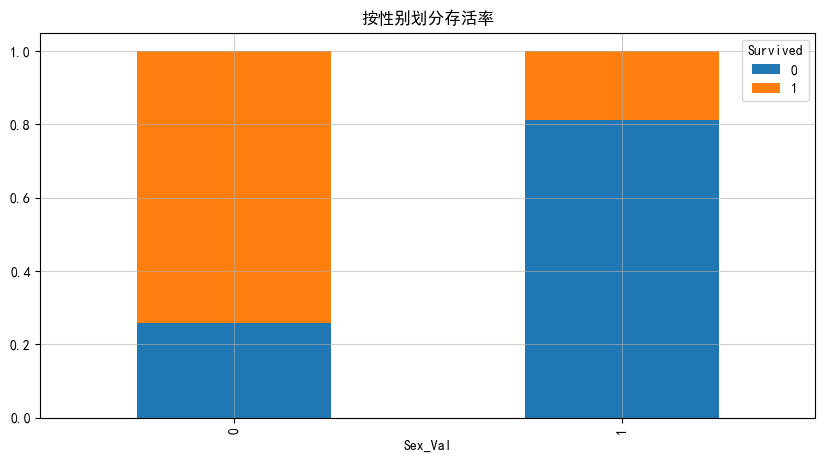

In [10]:
sex_val_xt=pd.crosstab(df_train['Sex_Val'],df_train['Survived'])
sex_val_xt_pct=sex_val_xt.div(sex_val_xt.sum(1).astype(float),axis=0)
sex_val_xt_pct.plot(kind='bar',stacked=True,title='按性别划分存活率')
plt.grid(alpha=0.6)

#### 可以看到女性的生存率比男性的生存率高

### 性别和乘客等级对存活率的影响

In [11]:
# 计算每个舱类的男性和女性数量
passenger_classes=sorted(df_train['Pclass'].unique())

for p_class in passenger_classes:
    print('M: ',p_class,len(df_train[(df_train['Sex']=='male') & (df_train['Pclass']==p_class)]))
    print('F: ',p_class,len(df_train[(df_train['Sex']=='female') & (df_train['Pclass']==p_class)]))

M:  1 122
F:  1 94
M:  2 108
F:  2 76
M:  3 347
F:  3 144


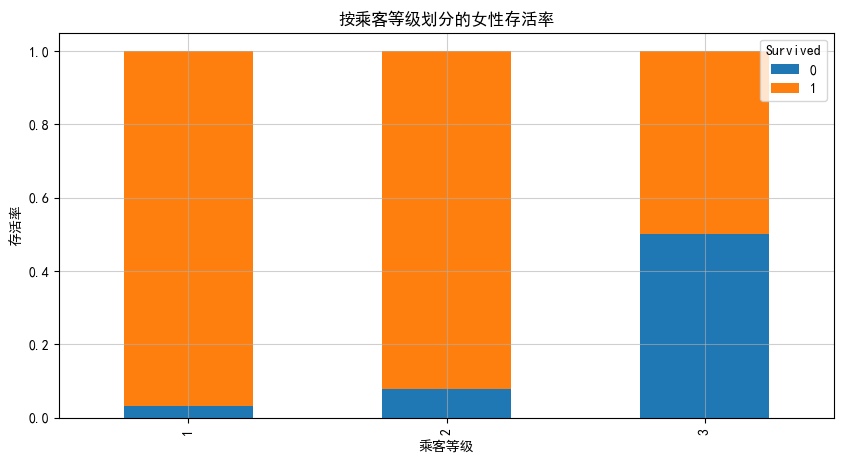

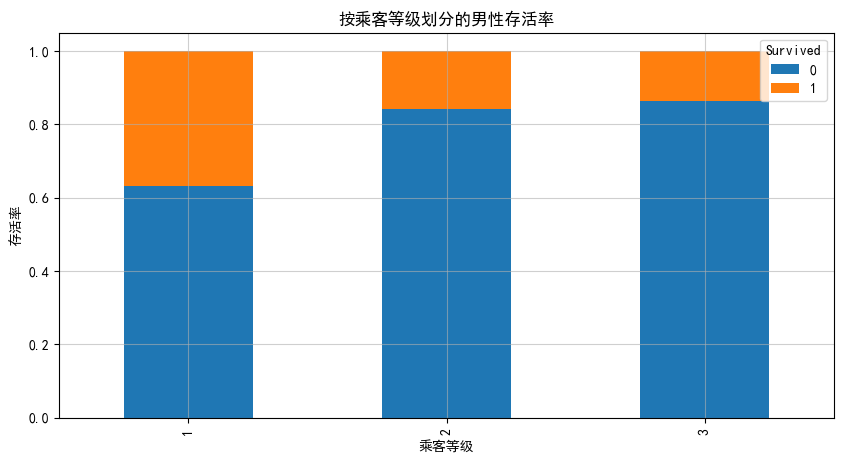

In [12]:
females_df=df_train[df_train['Sex']=='female']
females_xt=pd.crosstab(females_df['Pclass'],df_train['Survived'])
females_xt_pct=females_xt.div(females_xt.sum(1).astype(float),axis=0)
females_xt_pct.plot(kind='bar',stacked=True,title='按乘客等级划分的女性存活率')
plt.xlabel('乘客等级')
plt.ylabel('存活率')
plt.grid(alpha=0.6)

males_df=df_train[df_train['Sex']=='male']
males_xt=pd.crosstab(males_df['Pclass'],df_train['Survived'])
males_xt_pct=males_xt.div(males_xt.sum(1).astype(float),axis=0)
males_xt_pct.plot(kind='bar',stacked=True,title='按乘客等级划分的男性存活率')
plt.xlabel('乘客等级')
plt.ylabel('存活率')
plt.grid(alpha=0.6)

#### 一等和二等舱的绝大多数女性幸存下来。头等舱的男性生存率最高。

### 登船港口对生存率的影响

In [13]:
df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0


In [26]:
# 将 Embarked 从字符串映射到数字表示形式
embarked_locs = df_train['Embarked'].unique()
embarked_locs_mapping = dict(zip(embarked_locs, 
                                 range(0, len(embarked_locs) + 1)))
embarked_locs_mapping

{'S': 0, 'C': 1, 'Q': 2, nan: 3}

In [27]:
df_train['Embarked_Val'] = df_train['Embarked'] \
                               .map(embarked_locs_mapping) \
                               .astype(int)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,Embarked_Val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0


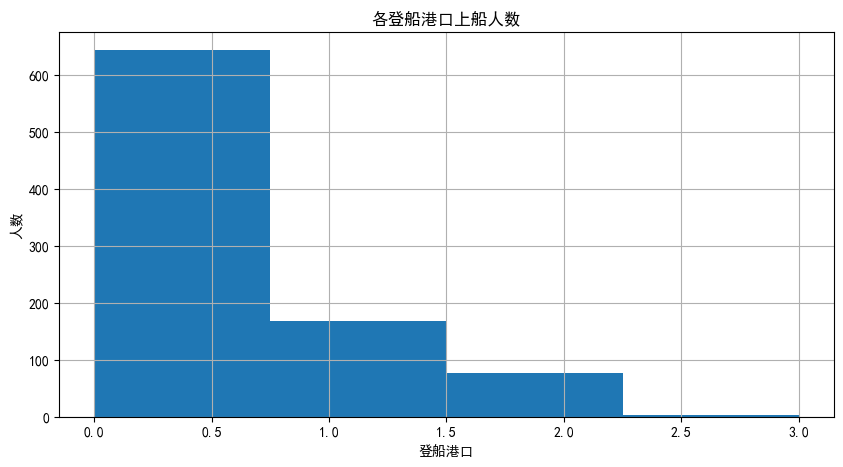

In [28]:
df_train['Embarked_Val'].hist(bins=len(embarked_locs), range=(0, 3))
plt.title("各登船港口上船人数")
plt.xlabel('登船港口')
plt.ylabel('人数')
plt.show()

#### 由于绝大多数乘客在"S"：0中登船，因此我们将 Embarked 中的缺失值分配给"S"

In [29]:
if len(df_train[df_train['Embarked'].isnull()]):
    df_train.replace({'Embarked_Val' : 
                   { 3 : 0 
                   }
               }, 
               inplace=True)

In [33]:
embarked_locs = sorted(df_train['Embarked_Val'].unique())
embarked_locs

[0, 1, 2]

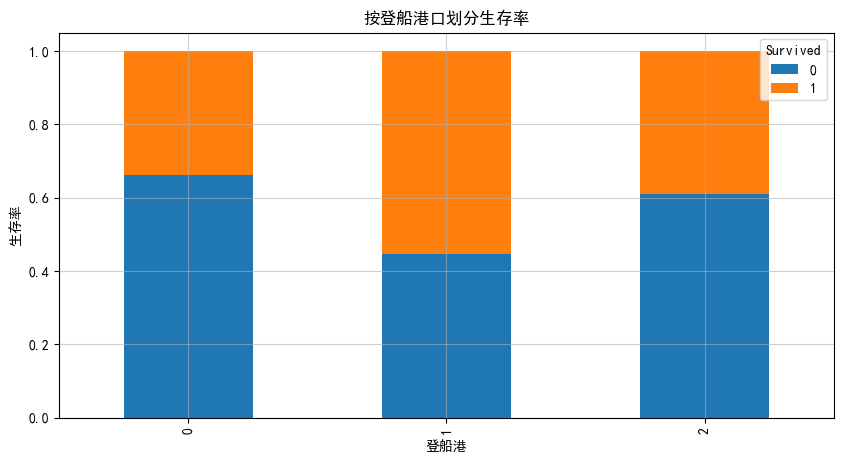

In [34]:
embarked_val_xt = pd.crosstab(df_train['Embarked_Val'], df_train['Survived'])
embarked_val_xt_pct = \
    embarked_val_xt.div(embarked_val_xt.sum(1).astype(float), axis=0)
embarked_val_xt_pct.plot(kind='bar', stacked=True)
plt.title('按登船港口划分生存率')
plt.xlabel('登船港')
plt.ylabel('生存率')
plt.grid(alpha=0.6)

In [36]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['Embarked_Val'], prefix='Embarked_Val')], axis=1)

#### 可以看出，那些在“C”港口：1出发的人存活率最高

### 年龄对生存率的影响

In [37]:
df_train[df_train['Age'].isnull()][['Sex','Pclass','Age']].head()

,Sex,Pclass,Age
5,male,3,NaN
17,male,2,NaN
19,female,3,NaN
26,male,3,NaN
28,female,3,NaN


In [38]:
df_train['AgeFill'] = df_train['Age']

# 用中位数填充年龄空值
df_train['AgeFill'] = df_train['AgeFill'].groupby([df_train['Sex_Val'],df_train['Pclass']],group_keys=False).apply(lambda x: x.fillna(x.median()))

In [39]:
len(df_train[df_train['AgeFill'].isnull()]) # 确保 'AgeFill' 不包含缺失值

0

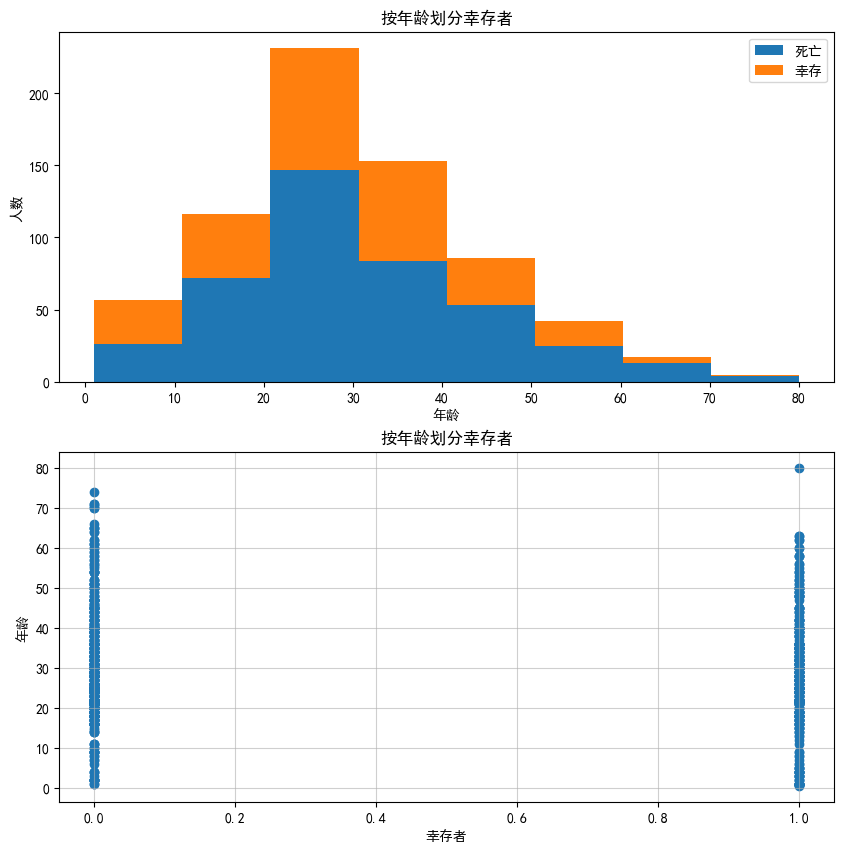

In [40]:
fig,axes=plt.subplots(2,1,figsize=fizsize_with_subplots)

df1=df_train[df_train['Survived']==0]['Age']
df2=df_train[df_train['Survived']==1]['Age']
max_age=max(df_train['AgeFill'])
axes[0].hist([df1,df2],bins=int(max_age / bin_size),range=(1,max_age),stacked=True)
axes[0].legend(('死亡','幸存'),loc='best')
axes[0].set_title('按年龄划分幸存者')
axes[0].set_xlabel('年龄')
axes[0].set_ylabel('人数')

axes[1].scatter(df_train['Survived'],df_train['AgeFill'])
axes[1].set_title('按年龄划分幸存者')
axes[1].set_xlabel('幸存者')
axes[1].set_ylabel('年龄')
plt.grid(alpha=0.6)

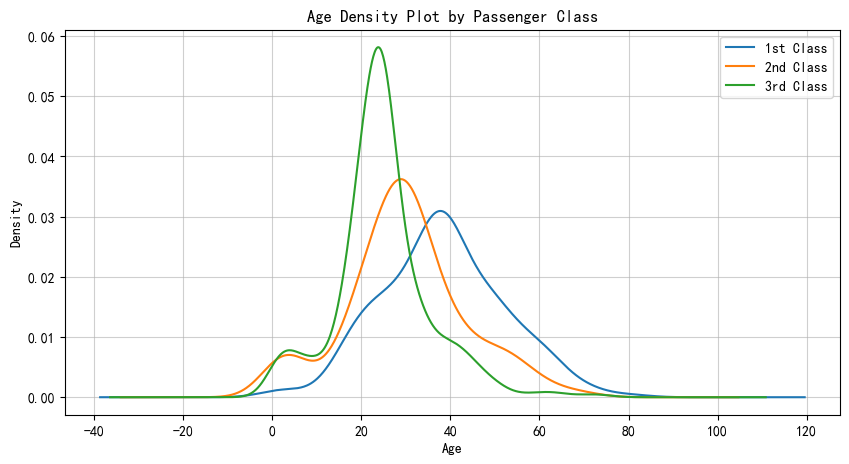

In [41]:
# 按乘客等级绘制年龄填充密度
for pclass in passenger_classes:
    df_train.AgeFill[df_train.Pclass == pclass].plot(kind='kde')
plt.title('Age Density Plot by Passenger Class')
plt.xlabel('Age')
plt.legend(('1st Class', '2nd Class', '3rd Class'), loc='best')
plt.grid(alpha=0.6)

#### 当按Pclass查看AgeFill密度时，我们看到头等舱乘客通常比二等舱乘客年龄大，而二等舱乘客又比三等舱乘客年长。我们已经确定头等舱乘客的存活率高于二等舱乘客，而二等舱乘客的存活率又高于三等舱乘客。

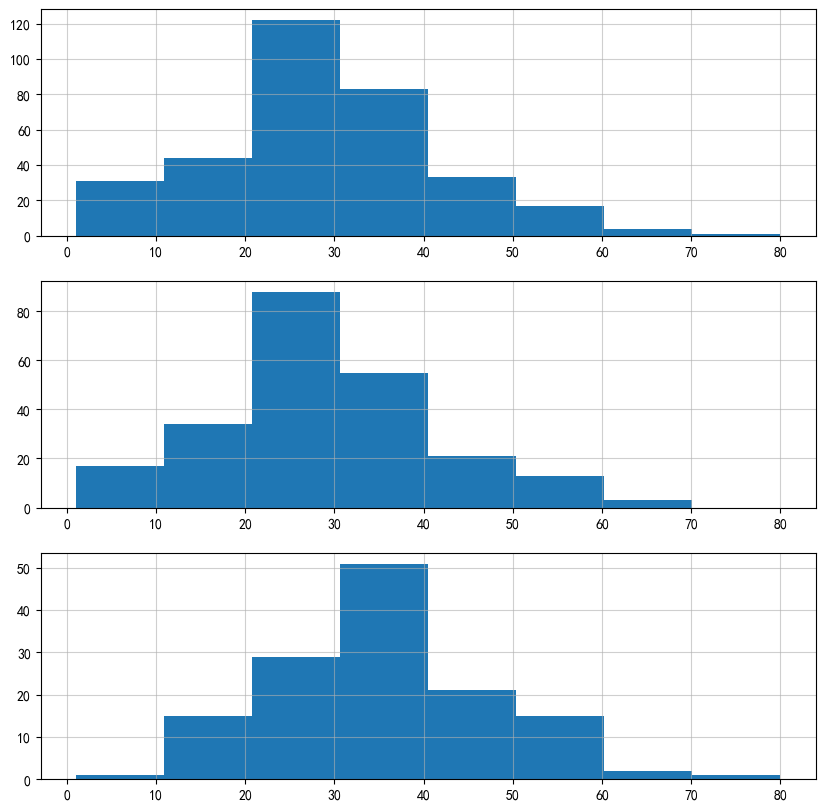

In [42]:
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 1)

# 幸存者
plt.subplot2grid(fig_dims, (0, 0))
survived_df = df_train[df_train['Survived'] == 1]
survived_df['AgeFill'].hist(bins=int(max_age / bin_size), range=(1, max_age))
plt.grid(alpha=0.6)

# 女性
plt.subplot2grid(fig_dims, (1, 0))
females_df = df_train[(df_train['Sex_Val'] == 0) & (df_train['Survived'] == 1)]
females_df['AgeFill'].hist(bins=int(max_age / bin_size), range=(1, max_age))
plt.grid(alpha=0.6)

# 头等舱
plt.subplot2grid(fig_dims, (2, 0))
class1_df = df_train[(df_train['Pclass'] == 1) & (df_train['Survived'] == 1)]
class1_df['AgeFill'].hist(bins=int(max_age / bin_size), range=(1, max_age))
plt.grid(alpha=0.6)

#### 在第一个图表中，我们看到大多数幸存者来自20年代至30年代的年龄范围，可以用以下两张图表来解释。第二张图显示大多数女性都在20多岁以内。第三张图显示大多数头等舱乘客都在30多岁以内。

### 家庭大小对生存率的影响

In [43]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch']
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,Embarked_Val,Embarked_Val_0,Embarked_Val_1,Embarked_Val_2,AgeFill,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1,0,0,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,1,0,38.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,0,26.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,0,0,35.0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1,0,0,35.0,0


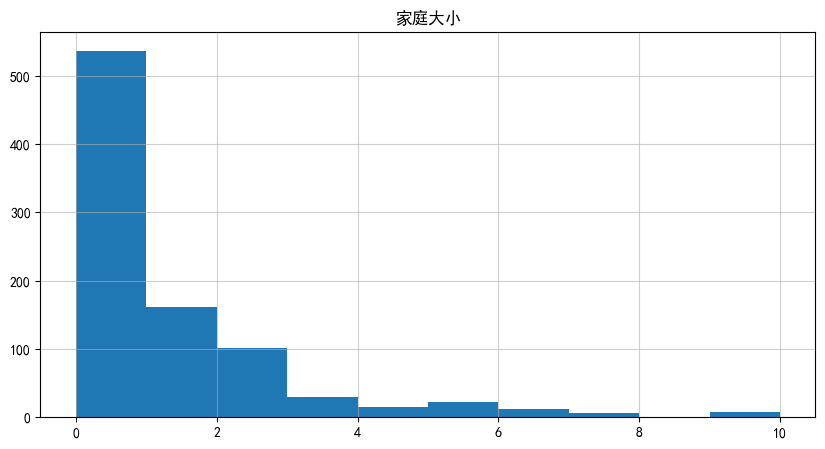

In [44]:
df_train['FamilySize'].hist()
plt.title('家庭大小')
plt.grid(alpha=0.6)

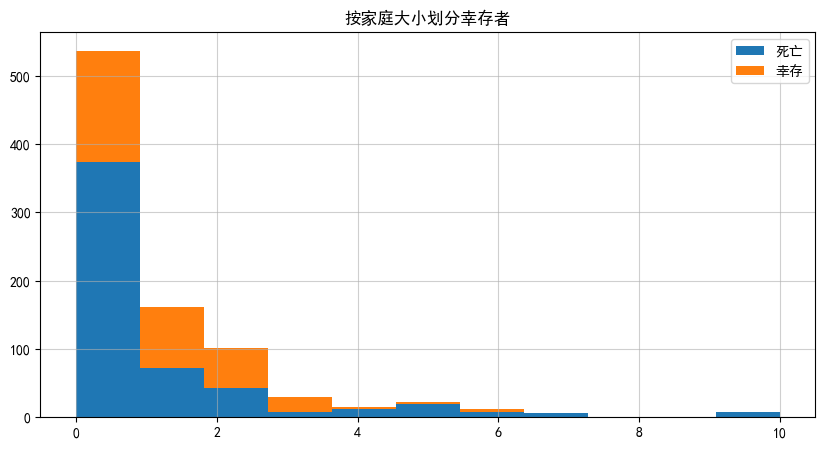

In [45]:
family_sizes = sorted(df_train['FamilySize'].unique())
family_size_max = max(family_sizes)

df1 = df_train[df_train['Survived'] == 0]['FamilySize']
df2 = df_train[df_train['Survived'] == 1]['FamilySize']
plt.hist([df1, df2], 
         bins=family_size_max + 1, 
         range=(0, family_size_max), 
         stacked=True)
plt.legend(('死亡', '幸存'), loc='best')
plt.title('按家庭大小划分幸存者')
plt.grid(alpha=0.6)

#### 根据直方图，FamilySize对生存的影响并不明显。机器学习算法可能会从此功能中受益。

### 机器学习的最终数据准备

In [46]:
df_train.dtypes[df_train.dtypes.map(lambda x: x =='object')]

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

In [47]:
# 删除不会使用的列
df_train=df_train.drop(['Name','Sex','Ticket','Cabin','Embarked'],axis=1)

In [48]:
df_train = df_train.drop(['Age', 'SibSp', 'Parch', 'PassengerId', 'Embarked_Val'], axis=1)
df_train.dtypes

Survived            int64
Pclass              int64
Fare              float64
Sex_Val             int32
Embarked_Val_0      uint8
Embarked_Val_1      uint8
Embarked_Val_2      uint8
AgeFill           float64
FamilySize          int64
dtype: object

In [49]:
train_data=df_train.values
train_data

array([[ 0.    ,  3.    ,  7.25  , ...,  0.    , 22.    ,  1.    ],
       [ 1.    ,  1.    , 71.2833, ...,  0.    , 38.    ,  1.    ],
       [ 1.    ,  3.    ,  7.925 , ...,  0.    , 26.    ,  0.    ],
       ...,
       [ 0.    ,  3.    , 23.45  , ...,  0.    , 21.5   ,  3.    ],
       [ 1.    ,  1.    , 30.    , ...,  0.    , 26.    ,  0.    ],
       [ 0.    ,  3.    ,  7.75  , ...,  1.    , 32.    ,  0.    ]])

### 数据整理摘要

In [50]:
def clean_data(df, drop_passenger_id):
    sexes = sorted(df['Sex'].unique())
    genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
    df['Sex_Val'] = df['Sex'].map(genders_mapping).astype(int)
    embarked_locs = df['Embarked'].unique()
    embarked_locs_mapping = dict(
        zip(embarked_locs, range(0,
                                 len(embarked_locs) + 1)))
    df = pd.concat(
        [df, pd.get_dummies(df['Embarked'], prefix='Embarked_Val')], axis=1)
    if len(df[df['Embarked'].isnull()]):
        df.replace(
            {
                'Embarked_Val': {
                    embarked_locs_mapping[nan]: embarked_locs_mapping['S']
                }
            },
            inplace=True)

    if len(df[df['Fare'].isnull()]):
        avg_fare = df['Fare'].mean()
        df['Fare'].fillna(avg_fare,inplace=True)
    df['AgeFill'] = df['Age']
    df['AgeFill'] = df['AgeFill'] \
                        .groupby([df['Sex_Val'], df['Pclass']],group_keys=False) \
                        .apply(lambda x: x.fillna(x.median()))
    df['FamilySize'] = df['SibSp'] + df['Parch']
    df = df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
    df = df.drop(['Age', 'SibSp', 'Parch'], axis=1)
    if drop_passenger_id:
        df = df.drop(['PassengerId'], axis=1)
    return df


### 随机森林：训练

In [51]:
# 创建随机森林对象
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)

In [52]:
# 拟合训练数据并创建决策树
train_features=train_data[:,1:]
train_target=train_data[:,0]
clf=clf.fit(train_features,train_target)
score=clf.score(train_features,train_target)
"Mean accuracy of Random Forest:{0}".format(score)

'Mean accuracy of Random Forest:0.9809203142536476'

### 随机森林：预测

In [53]:
# 读取测试数据
df_test=pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [54]:
# 测试数据不包含'Survived'列，使用经过训练的模型来预测这些值。
df_test = clean_data(df_test, drop_passenger_id=False)
test_data = df_test.values

In [55]:
# 获取决策树并在测试数据上运行它
test_x = test_data[:, 1:]

test_y = clf.predict(test_x)

### 评估模型准确性
#### 将拆分我们的训练数据，80% 将用于“训练”，20% 将用于“测试”

In [61]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(train_features, 
                                                    train_target, 
                                                    test_size=0.20, 
                                                    random_state=0)
print (train_features.shape, train_target.shape)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(891, 8) (891,)
(712, 8) (712,)
(179, 8) (179,)


In [63]:
# 使用新的训练数据来拟合模型、预测和获取准确率分数
clf = clf.fit(train_x, train_y)
predict_y = clf.predict(test_x)

from sklearn.metrics import accuracy_score
print ("Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))

Accuracy = 0.82


In [73]:
model_score = clf.score(test_x, test_y)
print ("Model Score %.2f \n" % (model_score))

confusion_matrix = metrics.confusion_matrix(test_y, predict_y)
print ("Confusion Matrix ", confusion_matrix)

print ("          Predicted")
print ("         |  0  |  1  |")
print ("         |-----|-----|")
print ("       0 | %3d | %3d |" % (confusion_matrix[0, 0],
                                   confusion_matrix[0, 1]))
print ("Actual   |-----|-----|")
print ("       1 | %3d | %3d |" % (confusion_matrix[1, 0],
                                   confusion_matrix[1, 1]))
print ("         |-----|-----|")

Model Score 0.82 

Confusion Matrix  [[97 13]
 [19 50]]
          Predicted
         |  0  |  1  |
         |-----|-----|
       0 |  97 |  13 |
Actual   |-----|-----|
       1 |  19 |  50 |
         |-----|-----|


In [74]:
from sklearn.metrics import classification_report
print(classification_report(test_y, 
                            predict_y, 
                            target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.84      0.88      0.86       110
    Survived       0.79      0.72      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179

